# Exploratory Data Analysis

In [51]:
#install libraries
#install.packages("pastecs")
#install.packages("ggplot2")
#install.packages("RSQLite")
#install.packages("dplyr")
#install.packages("DBI")
#install.packages("lubridate")

Warning message:
"package 'lubridate' is in use and will not be installed"


In [1]:
library(DBI)
library(dplyr)
library(pastecs)
library(ggplot2)

Warning message:
"package 'DBI' was built under R version 3.6.2"
Warning message:
"package 'dplyr' was built under R version 3.6.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'pastecs' was built under R version 3.6.2"

Attaching package: 'pastecs'


The following objects are masked from 'package:dplyr':

    first, last


Warning message:
"package 'ggplot2' was built under R version 3.6.2"


In [52]:
library(lubridate)
library(RSQLite)

In [2]:
con <- dbConnect(odbc::odbc(), .connection_string = "DSN=BoxOffice;Trusted_Connection=yes;", timeout = 10)

In [10]:
movies_ff <- dbReadTable(con,"movies_ff_v")

In [33]:
save(movies_ff,file="C:/Users/michs/Documents/DataScience/data/BoxOffice_ff.RData")

In [3]:
load("C:/Users/michs/Documents/DataScience/data/BoxOffice_ff.RData")

# Main table analysis

In [4]:
summary(movies_ff)

    movie_id        budget          original_language    popularity     
 Min.   :   1   Min.   :        0   Length:7375        Min.   :  0.000  
 1st Qu.:1848   1st Qu.:        0   Class :character   1st Qu.:  3.970  
 Median :3696   Median :  8000000   Mode  :character   Median :  7.456  
 Mean   :3698   Mean   : 22666657                      Mean   :  8.540  
 3rd Qu.:5550   3rd Qu.: 29000000                      3rd Qu.: 10.932  
 Max.   :7398   Max.   :380000000                      Max.   :547.488  
                                                                        
 release_date          runtime      runtime_cat           revenue         
 Length:7375        Min.   :  0.0   Length:7375        Min.   :1.000e+00  
 Class :character   1st Qu.: 94.0   Class :character   1st Qu.:2.405e+06  
 Mode  :character   Median :104.0   Mode  :character   Median :1.693e+07  
                    Mean   :107.7                      Mean   :6.688e+07  
                    3rd Qu.:118.0        

In [54]:
stat.desc(movies_ff)

,movie_id,budget,original_language,popularity,release_date,runtime,runtime_cat,revenue,sw_lang_en,sw_web_presence,...,depart_Camera_female,depart_Crew_female,depart_Custom_Mkup_female,depart_Directing_female,depart_Editing_female,depart_Lighting_female,depart_Production_female,depart_Sound_female,depart_Visual_Effects_female,depart_Writing_female
,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,7.375000e+03,7.375000e+03,NA,7.375000e+03,NA,7.370000e+03,NA,2.993000e+03,7.375000e+03,7.375000e+03,...,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03
nbr.null,0.000000e+00,2.012000e+03,NA,0.000000e+00,NA,1.900000e+01,NA,0.000000e+00,1.039000e+03,5.012000e+03,...,7.194000e+03,6.971000e+03,5.293000e+03,6.297000e+03,6.516000e+03,7.336000e+03,3.872000e+03,6.840000e+03,7.281000e+03,6.578000e+03
nbr.na,0.000000e+00,0.000000e+00,NA,0.000000e+00,NA,5.000000e+00,NA,4.382000e+03,0.000000e+00,0.000000e+00,...,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01
min,1.000000e+00,0.000000e+00,NA,1.000000e-06,NA,0.000000e+00,NA,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.398000e+03,3.800000e+08,NA,5.474883e+02,NA,3.380000e+02,NA,1.519558e+09,1.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+01,6.000000e+00,4.000000e+00,5.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,2.000000e+00,5.000000e+00
range,7.397000e+03,3.800000e+08,NA,5.474883e+02,NA,3.380000e+02,NA,1.519558e+09,1.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+01,6.000000e+00,4.000000e+00,5.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,2.000000e+00,5.000000e+00
sum,2.727365e+07,1.671666e+11,NA,6.298085e+04,NA,7.940970e+05,NA,2.001698e+11,6.336000e+03,2.363000e+03,...,1.500000e+02,4.730000e+02,2.595000e+03,1.127000e+03,8.930000e+02,5.000000e+00,6.898000e+03,5.810000e+02,6.200000e+01,9.120000e+02
median,3.696000e+03,8.000000e+06,NA,7.455875e+00,NA,1.040000e+02,NA,1.692814e+07,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
mean,3.698122e+03,2.266666e+07,NA,8.539777e+00,NA,1.077472e+02,NA,6.687931e+07,8.591186e-01,3.204068e-01,...,2.043318e-02,6.443264e-02,3.534941e-01,1.535213e-01,1.216456e-01,6.811061e-04,9.396540e-01,7.914453e-02,8.445716e-03,1.242338e-01


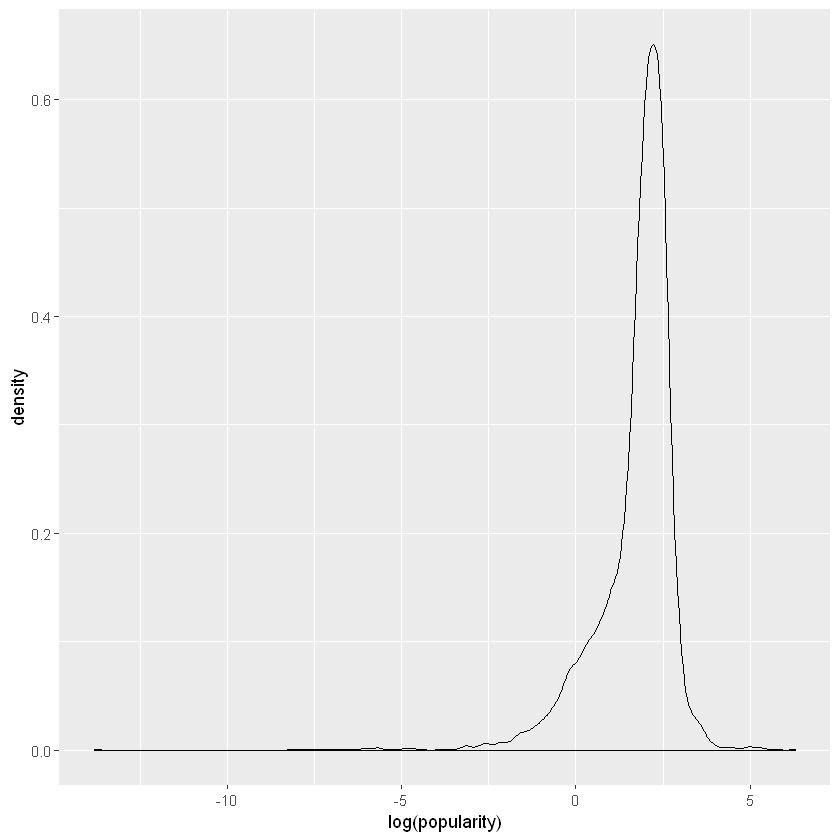

In [81]:
#popularity
ggplot(data=movies_ff) +
    geom_density(aes(x = log(popularity)))

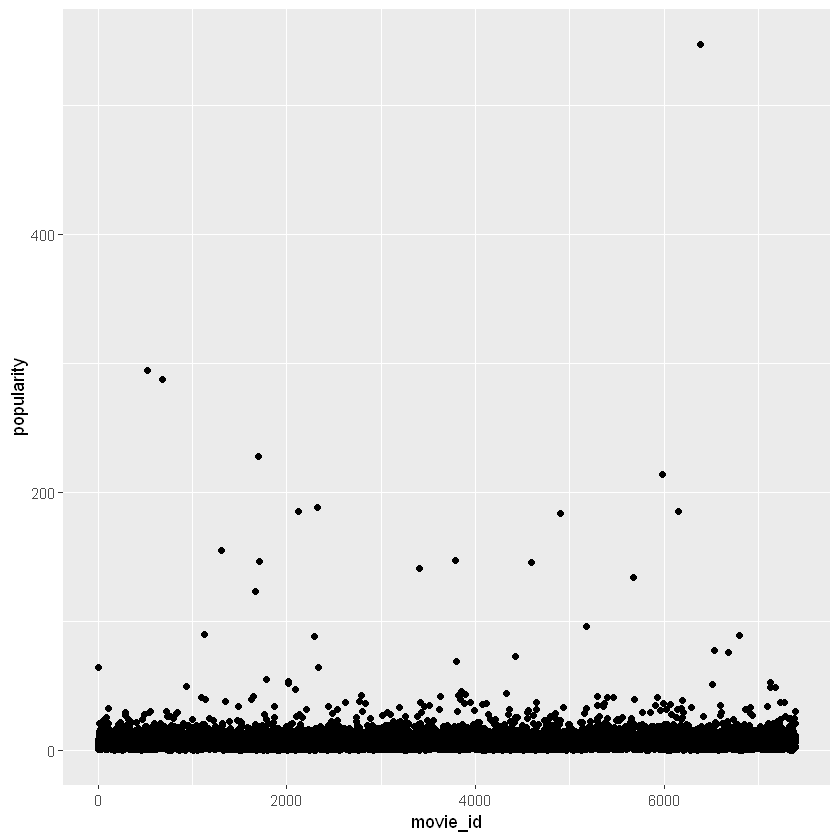

In [25]:
#popularity
ggplot(data=movies_ff) +
  geom_point(aes(x=movie_id , y=popularity))

Warning message:
"Removed 123 rows containing non-finite values (stat_density)."


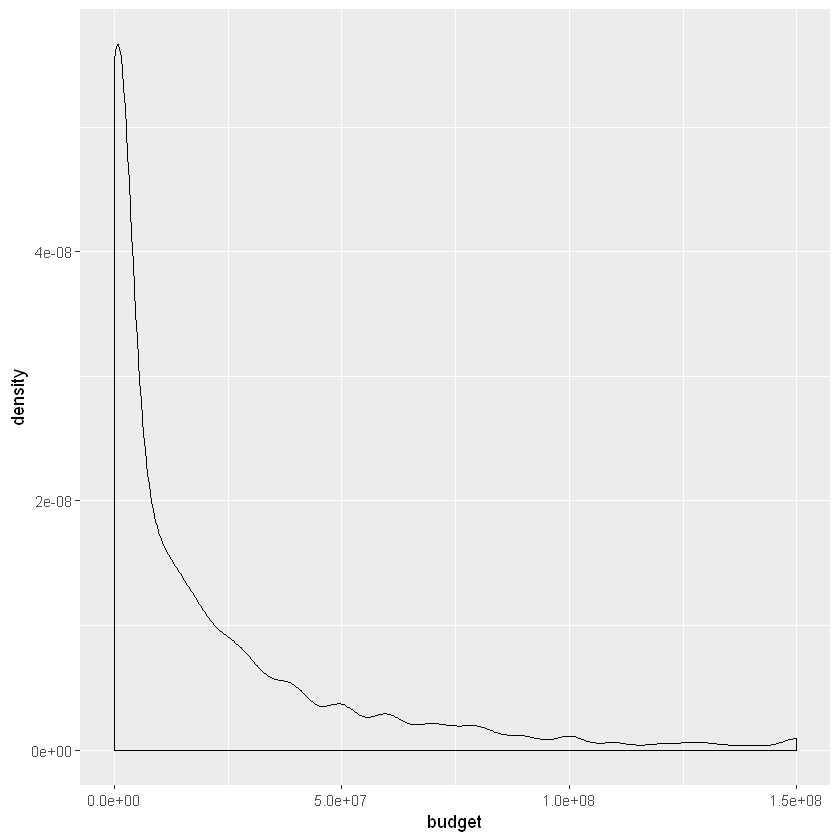

In [18]:
#budget
ggplot(data=movies_ff) +
    geom_density(aes(x = budget)) + xlim(0,150000000)

Warning message:
"Removed 4443 rows containing non-finite values (stat_density)."


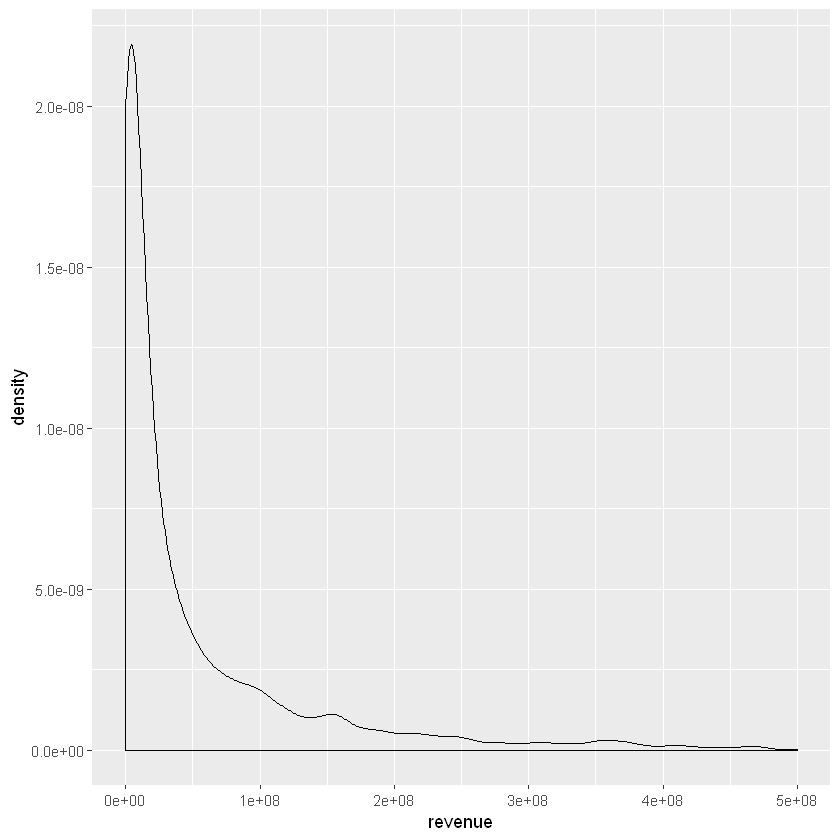

In [47]:
#revenue
ggplot(data=movies_ff) +
    geom_density(aes(x = revenue))  + xlim(0,500000000)

Warning message:
"Removed 5 rows containing missing values (geom_point)."


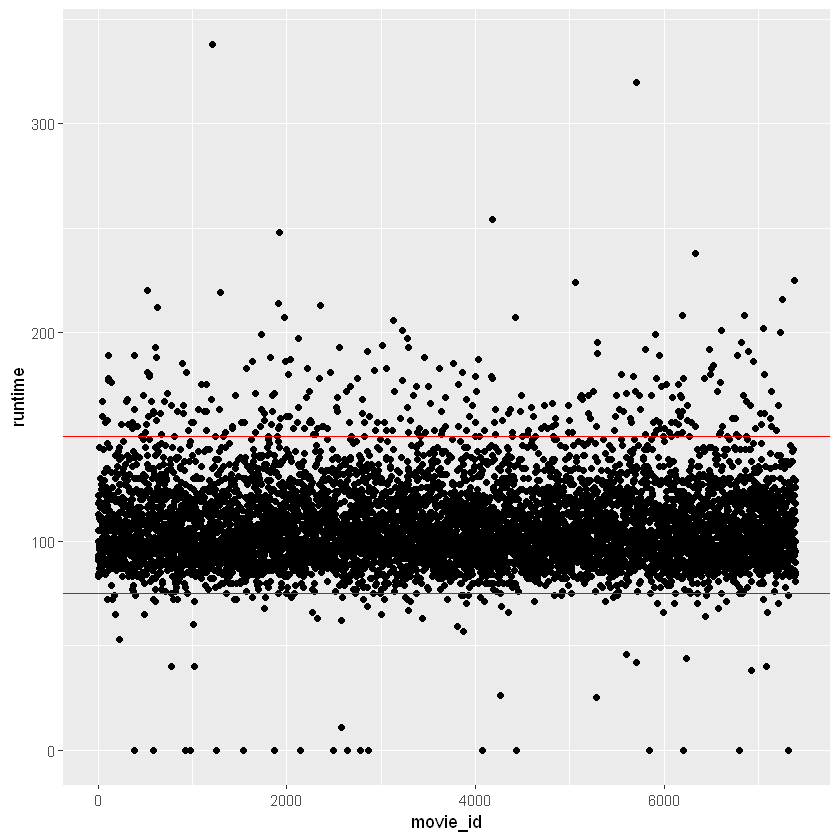

In [57]:
#runtime
ggplot(data=movies_ff) +
  geom_point(aes(x=movie_id , y=runtime)) + geom_hline(yintercept = 75,color="red") + geom_hline(yintercept = 150,color="red")


Warning message:
"Removed 26 rows containing non-finite values (stat_density)."


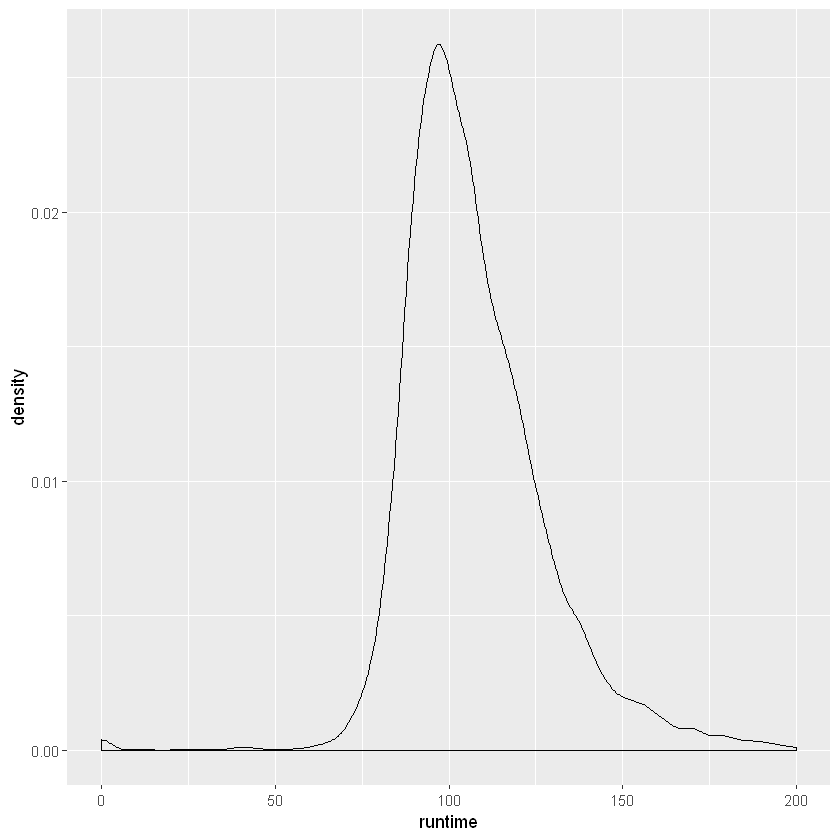

In [23]:
#runtime
ggplot(data=movies_ff) +
    geom_density(aes(x = runtime)) + xlim(0,200)

Selecting by n


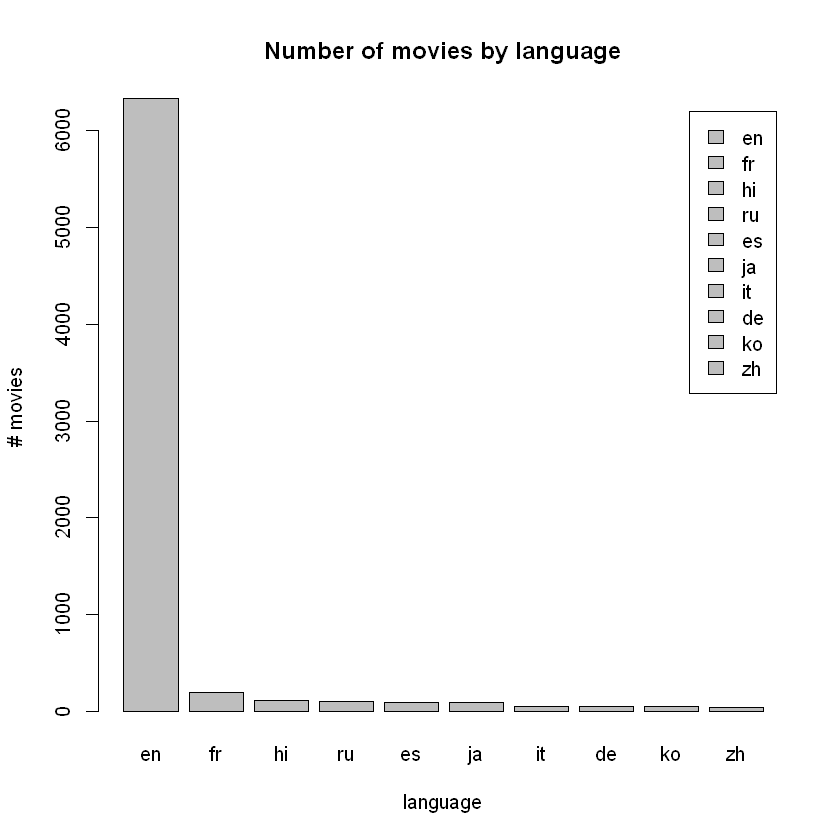

In [33]:
#language
lang_count <- movies_ff %>% group_by(original_language) %>% summarise(n=n()) %>% arrange(desc(n)) %>% top_n(10)
barplot(lang_count$n,main="Number of movies by language",legend.text = lang_count[[1]], names.arg = lang_count[[1]] ,xlab="language",ylab="# movies")

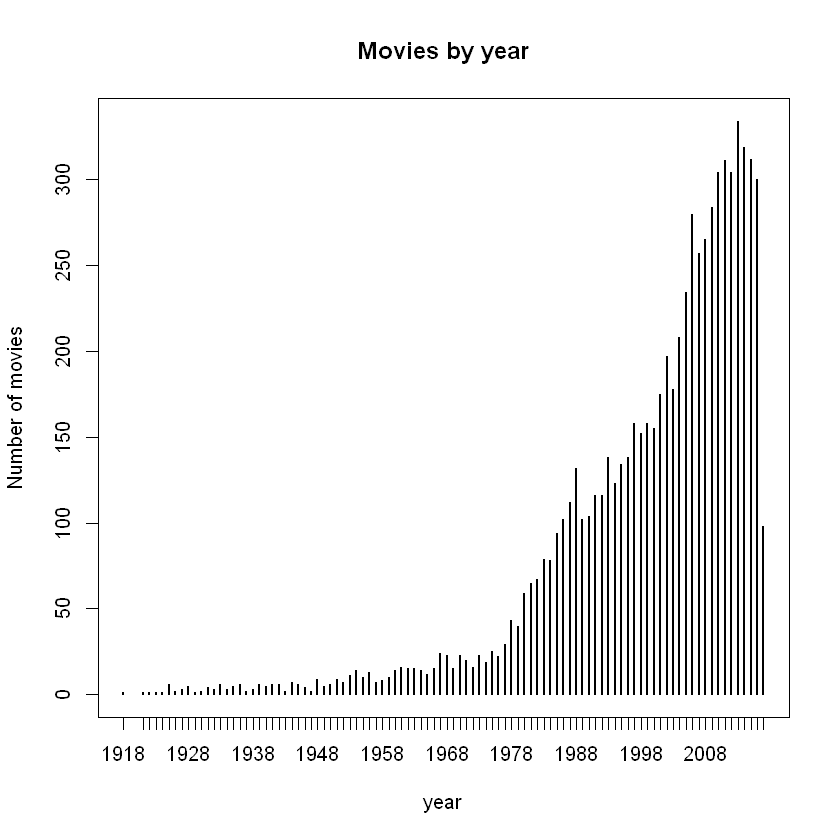

In [71]:
plot(table(year(movies_ff$release_date)),ylab="Number of movies",xlab="year",main="Movies by year")

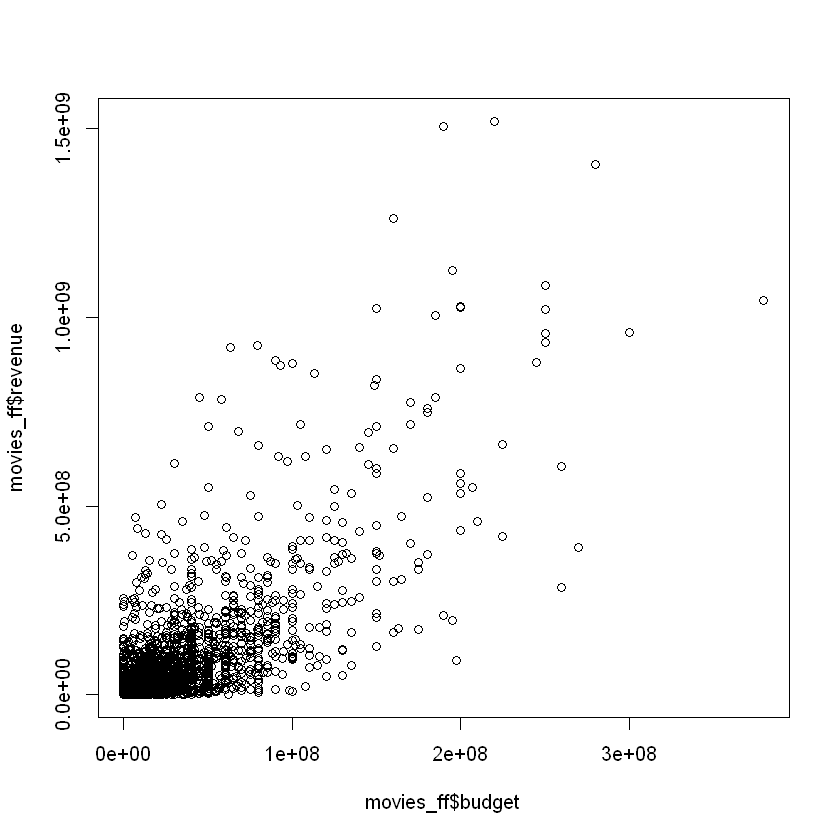

In [49]:
##section 4  - checking revenue vs others
plot(movies_ff$revenue ~ movies_ff$budget)

In [58]:
movies_ff <- movies_ff %>% 
    mutate(orig_lang2=ifelse(original_language %in% c("en","fr","in","ru","es","ja"),original_language,'other'))

Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


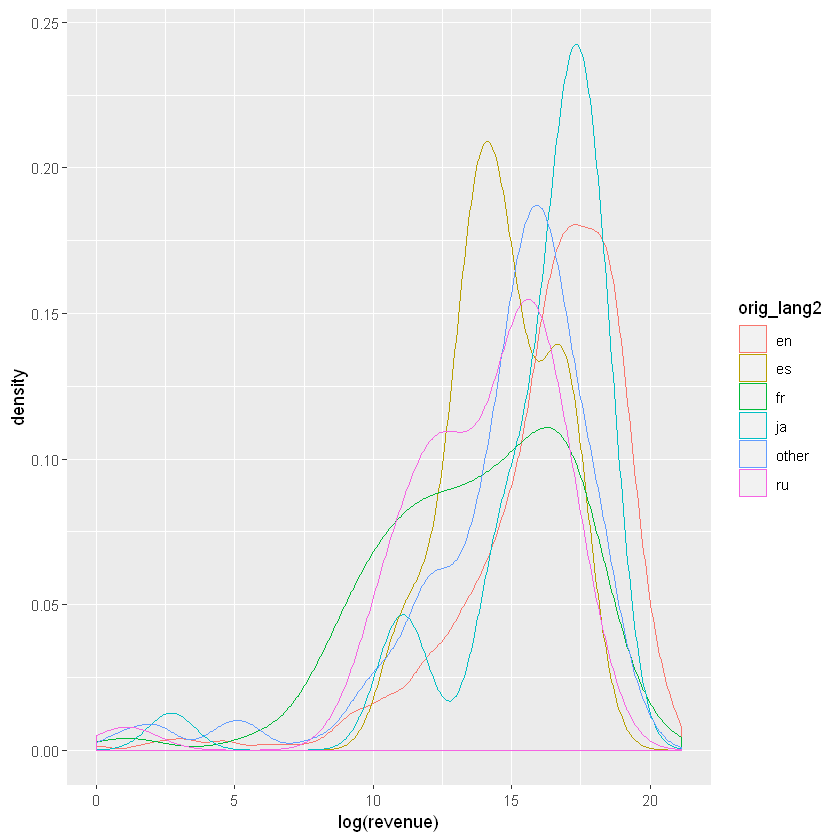

In [59]:
ggplot(data=movies_ff) +
    geom_density(aes(log(revenue), group=orig_lang2, color=orig_lang2))

Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."


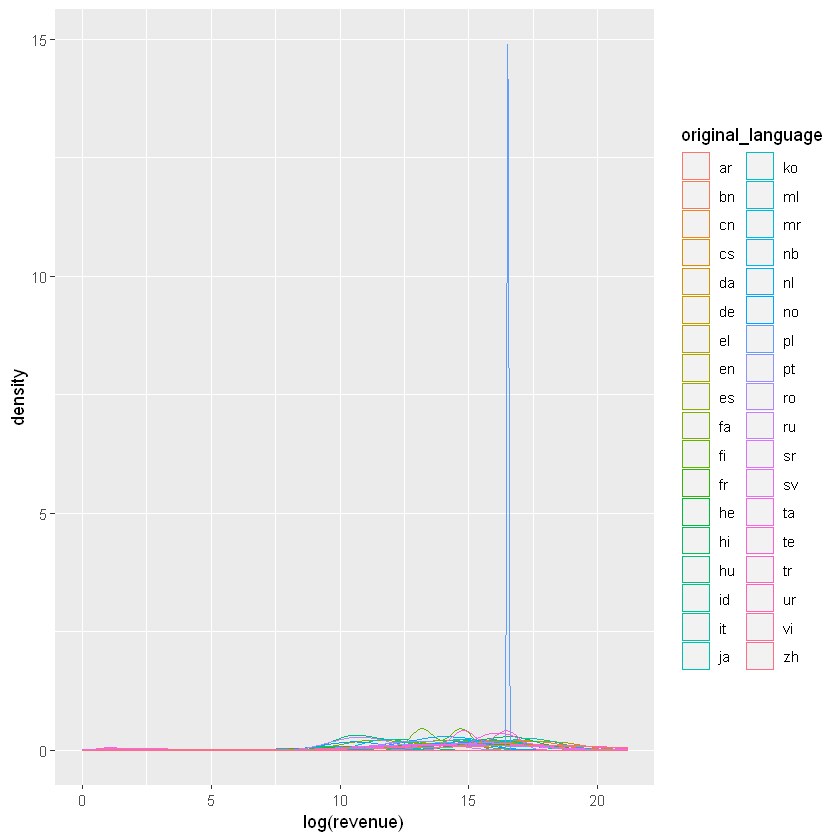

In [60]:
ggplot(data=movies_ff) +
    geom_density(aes(log(revenue), group=original_language, color=original_language ))

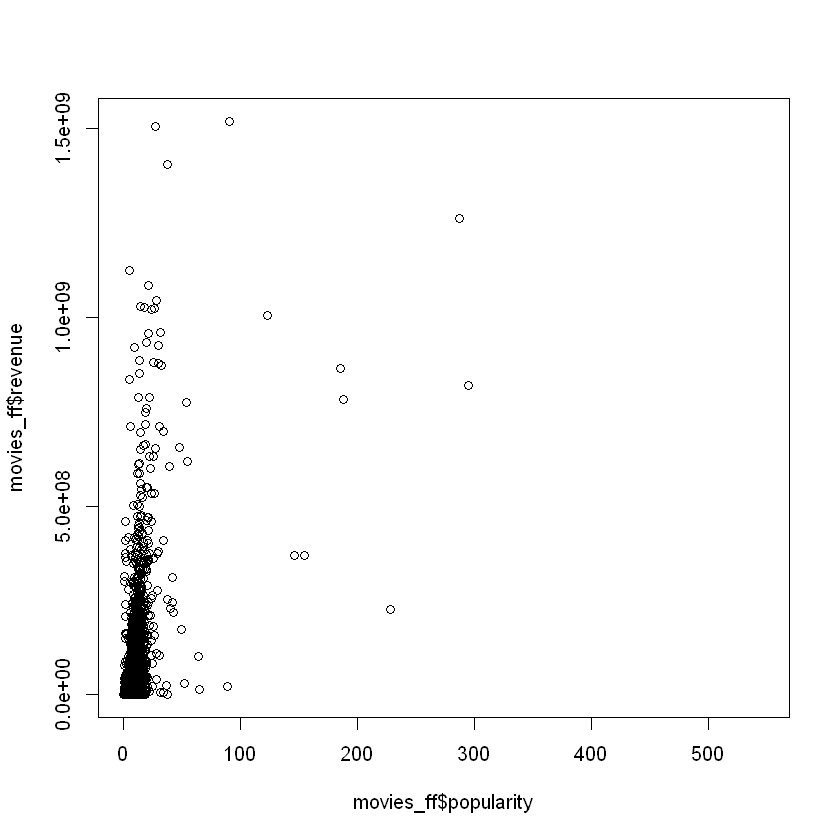

In [62]:
plot(movies_ff$revenue ~ movies_ff$popularity)

NULL


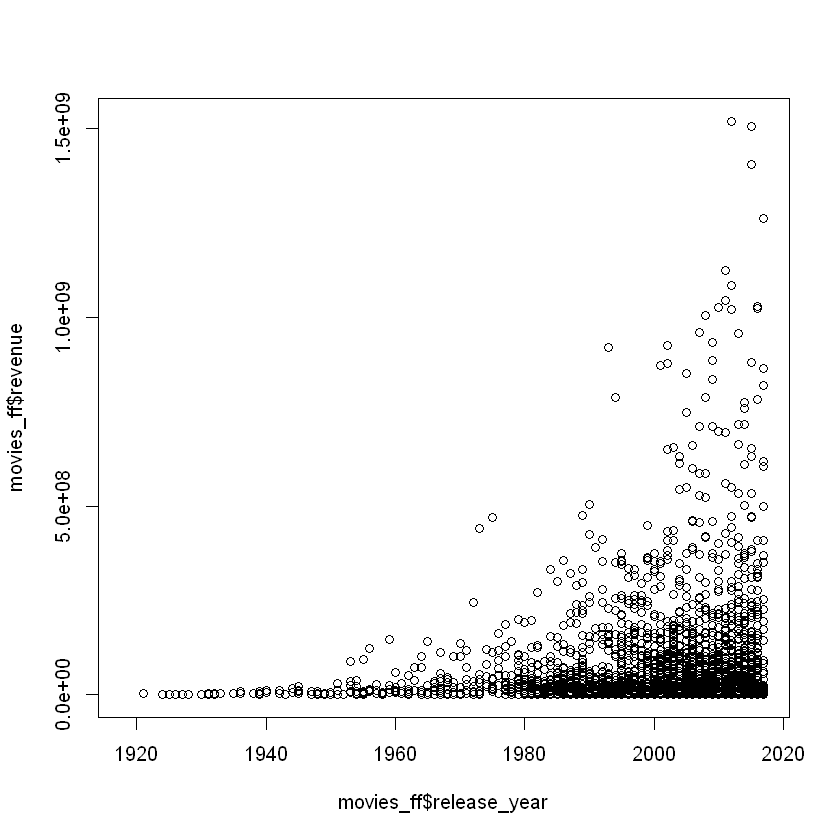

In [68]:
plot(movies_ff$revenue ~ movies_ff$release_year)

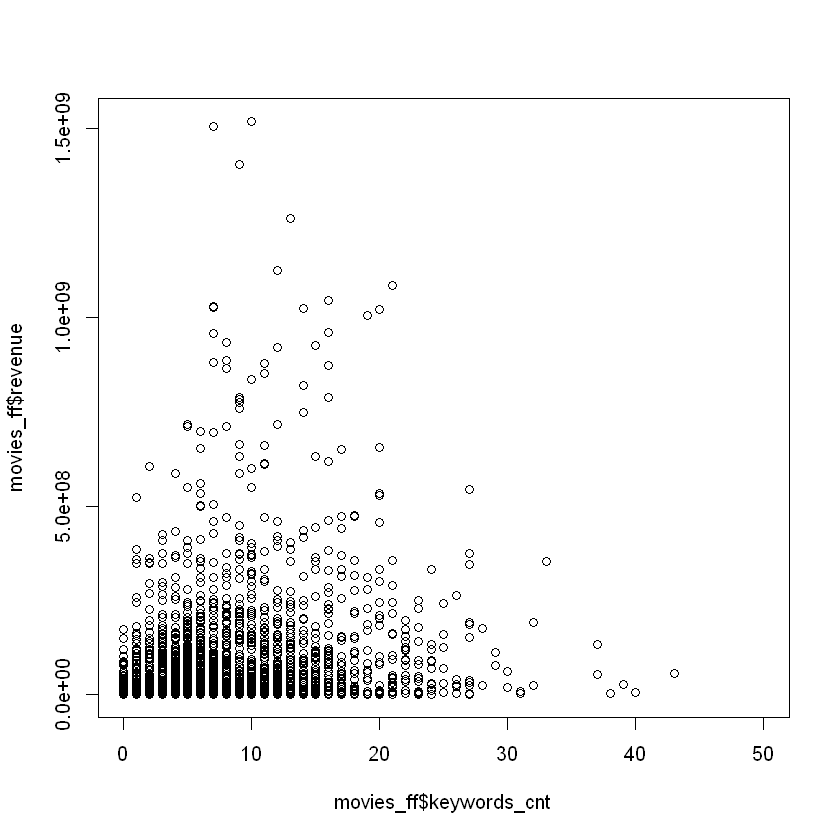

In [70]:
plot(movies_ff$revenue ~ movies_ff$keywords_cnt, xlim=c(0,50))